In [50]:
import matplotlib
from matplotlib import pyplot as plt
from ren import renAlgo
import numpy as np
import os
from calibrate import focal2distance
import pickle
import cv2
import scipy

In [51]:
smoothDepth=pickle.load(open( "smoothDepth.p", "rb" ))
    

In [52]:
np.histogram(smoothDepth)

(array([1282253,       0,       0, 3894769,       0,       0, 2346027,
        2650972, 1524758,  493989]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

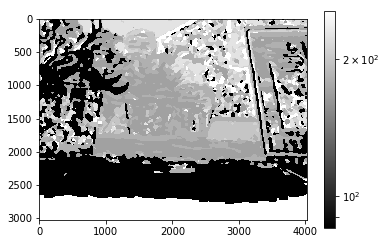

In [53]:
plt.imshow(smoothDepth,norm=matplotlib.colors.LogNorm(),cmap='gray')
plt.colorbar()

In [54]:
a=(smoothDepth)*255
b=a.astype(np.dtype('uint8'))

In [55]:
better=cv2.bilateralFilter(b, 50,80,80)

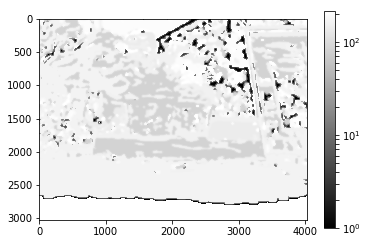

In [56]:
plt.imshow(better,norm=matplotlib.colors.LogNorm(),cmap='gray')
plt.colorbar()

In [57]:
def neighbourReplace(src,size):
    Rf=scipy.ndimage.maximum_filter(src,size=size)
    src[np.where(src<=0.49)]= Rf[np.where(src<=0.49)]
    return src

In [60]:
result=neighbourReplace(smoothDepth,50)

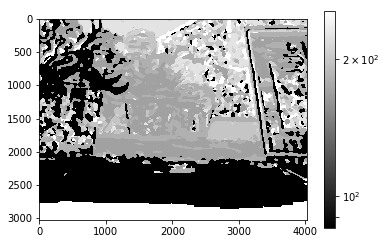

In [61]:
plt.imshow(result,norm=matplotlib.colors.LogNorm(),cmap='gray')
plt.colorbar()

In [37]:
a=(result)*255


In [49]:
plt.imsave("newmap.png",a,cmap="gray")
